<a href="https://colab.research.google.com/github/chalika-vanyaa/Content-Based_KMeans-Clustering_Recommendation_System/blob/main/Beauty_Products_Recommender_System_Project_Chalika_Vanya_Resya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyek 2: Beauty & Cosmetics Products Recommender System**
- **Nama:** Chalika Vanya Resya
- **Email:** chalikavanya@gmail.com
- **ID Dicoding:** chalikavanyaa
- **Course**: *Applied Machine Learning*

## **Import Libraries**

> Pada bagian ini dilakukan `import` seluruh *library* yang digunakan pada pembuatan projek, termasuk untuk **`data loading`**, **`exploratory data analysis`**, **`data preprocessing`**, serta **`modeling dan evaluation`**.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from google.colab import drive

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## **About Dataset**

> *Dataset* yang digunakan dalam proyek ini merupakan **data sintetis** yang merepresentasikan informasi produk-produk kecantikan. Setiap baris dalam data menggambarkan satu produk. Berikut adalah penjelasan dari masing-masing fitur yang terdapat dalam *dataset*:

- `Product_Name`: Nama dari produk kecantikan
- `Brand`: Merek atau produsen dari produk kecantikan.
- `Category`: Kategori produk berdasarkan jenisnya, seperti *moisturizer*, *cleanser*, *face mask*, *serum*, *lip gloss*, dan lainnya.
- `Gender_Target`: Segmentasi target pengguna berdasarkan gender
- `User_Skin_Type`: Jenis kulit yang menjadi target penggunaan produk, seperti: `oily` (berminyak), `dry` (kering), `normal` (normal), `combination` (kombinasi), dan `sensitive` (sensitif)
- `Product_Size`: Ukuran atau volume produk, dinyatakan dalam satuan ml.
- `Packaging_Type`: Jenis kemasan produk, misalnya *bottle*, *tube*, *jar*, atau *compact*.
- `Main_Ingredient`: Bahan utama atau kandungan aktif utama dari produk. Contoh: *Hyaluronic Acid*, *Vitamin C*, *Retinol*.
- `Cruelty_Free`: Indikator apakah produk tidak diuji pada hewan (`True`) atau tidak (`False`).
- `Country_of_Origin`: Negara asal produk atau negara tempat produk tersebut diproduksi. Contoh: *USA*, *France*, *South Korea*.
- `Price_USD`: Harga produk yang disimulasikan dalam satuan USD.
- `Rating`: Nilai yang mencerminkan tingkat kepuasan konsumen terhadap produk, tidak terbatas dari rentang 1-5.
- `Number_of_Reviews`: Jumlah ulasan yang diberikan oleh pengguna. Fitur ini mengindikasikan tingkat **popularitas** atau **eksposur** produk di pasar.
- `Usage_Frequency`: Frekuensi penggunaan produk, misalnya *daily*, *weekly*, atau *occassional*. Informasi ini memberikan konteks seberapa sering produk biasanya digunakan oleh konsumen.


> Sumber dataset: [Beauty & Cosmetics Products Dataset](https://www.kaggle.com/datasets/waqi786/most-used-beauty-cosmetics-products-in-the-world)

## **Data Loading**

> Pada bagian ini dilakukan tahapan ***data loading***, dengan mengambil file *dataset* yang sudah tersimpan pada folder di google drive.

In [2]:
# mount drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# data loading
fileName = '/content/drive/MyDrive/Online Courses/Dicoding/ML Engineer Track/Level Mahir/Projects/Recommender System Project/'
os.chdir(fileName)

df = pd.read_csv('beauty_cosmetics.csv')
df.head()

,Product_Name,Brand,Category,Usage_Frequency,Price_USD,Rating,Number_of_Reviews,Product_Size,Skin_Type,Gender_Target,Packaging_Type,Main_Ingredient,Cruelty_Free,Country_of_Origin
0,Ultra Face Mask,Drunk Elephant,Blush,Weekly,67.85,1.4,686,30ml,Sensitive,Female,Tube,Retinol,False,Australia
1,Ultra Lipstick,Laura Mercier,Makeup Remover,Occasional,116.43,4.2,5483,250ml,Dry,Unisex,Bottle,Shea Butter,False,UK
2,Ultra Serum,Natasha Denona,Highlighter,Daily,90.84,1.6,5039,100ml,Sensitive,Male,Compact,Aloe Vera,True,Italy
3,Divine Serum,Ilia Beauty,Face Mask,Occasional,55.17,3.2,6202,250ml,Normal,Male,Tube,Glycerin,True,South Korea
4,Super Foundation,Charlotte Tilbury,Highlighter,Occasional,140.56,1.7,297,100ml,Oily,Female,Compact,Glycerin,False,Germany


> Kode di atas melakukan *mounting* pada google drive untuk mengambil file *dataset* yang disimpan pada folder dengan url yang tertera. File *dataset* diberi nama `beauty_cosmetics.csv` yang merupakan *dataset* sintesis berisi kumpulan produk kecantikan dan kosmetik. Data ini diambil dari Kaggle dan dapat diakses melalui link berikut: [Beauty & Cosmetics Products Dataset](https://www.kaggle.com/datasets/waqi786/most-used-beauty-cosmetics-products-in-the-world).

## **Data Understanding**

> Pada bagian ini dikulik mengenai data, seperti jumlah baris dan kolom, tipe data kolom, statistik deskriptif, *missing values*, hingga analisis dan perbaikan singkat pada data sebelum masuk ke tahapan *exploratory data analysis*.

In [4]:
# display information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product_Name       15000 non-null  object 
 1   Brand              15000 non-null  object 
 2   Category           15000 non-null  object 
 3   Usage_Frequency    15000 non-null  object 
 4   Price_USD          15000 non-null  float64
 5   Rating             15000 non-null  float64
 6   Number_of_Reviews  15000 non-null  int64  
 7   Product_Size       15000 non-null  object 
 8   Skin_Type          15000 non-null  object 
 9   Gender_Target      15000 non-null  object 
 10  Packaging_Type     15000 non-null  object 
 11  Main_Ingredient    15000 non-null  object 
 12  Cruelty_Free       15000 non-null  bool   
 13  Country_of_Origin  15000 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(10)
memory usage: 1.5+ MB


> *Dataset* terdiri dari 15.000 data dengan 14 kolom dengan tipe berbeda, termasuk numerik (`Price_USD`, `Rating`, dan `Number_of_Reviews`), boolean (`Cruelty_Free`), serta kategorikal (`Product_Name`, `Brand`, `Category`, `Usage_Frequency`, `Product_Size`, `Skin_Type`, `Gender_Target`, `Packaging_Type`, dan `Country_of_Origin`). Sekilas terlihat bahwa tidak terdapat nilai null pada masing-masing kolom.

In [5]:
# descriptive statistics
df.describe()

,Price_USD,Rating,Number_of_Reviews
count,15000.000000,15000.000000,15000.000000
mean,80.134108,3.002327,5014.231333
std,40.402983,1.168029,2855.665464
min,10.000000,1.000000,52.000000
25%,45.480000,2.000000,2562.000000
50%,80.040000,3.000000,5002.000000
75%,114.760000,4.000000,7497.000000
max,149.990000,5.000000,10000.000000


> Tabel di atas menampilkan data statistik deskriptif setiap kolom numerik pada *dataset*, yaitu:
- `count`: jumlah data pada kolom
- `mean`: rata-rata keseluruhan data pada kolom
- `std`: standard deviation/simpangan baku data pada kolom
- `min`: nilai terkecil pada kolom
- `25%`: kuartil bawah (Q1) pada kolom
- `50%`: median/kuartil tengah (Q2) pada kolom
- `75%`: kuartil atas (Q3) pada kolom
- `max`: nilai terbesar pada kolom

In [6]:
# descriptive statistics of categorical columns
df.describe(include='object')

,Product_Name,Brand,Category,Usage_Frequency,Product_Size,Skin_Type,Gender_Target,Packaging_Type,Main_Ingredient,Country_of_Origin
count,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000
unique,120,40,24,4,6,5,3,6,7,8
top,Super Setting Spray,Milk Makeup,Serum,Occasional,100ml,Combination,Male,Jar,Retinol,Italy
freq,154,426,710,3794,2551,3060,5017,2567,2180,1942


> Tabel di atas menampilkan data statistik deskriptif setiap kolom kategorikal pada *dataset*, yaitu:
- `count`: jumlah data pada kolom
- `unique`: total nilai unik pada kolom
- `top`: nilai modus pada kolom
- `freq`: jumlah data modus pada kolom

In [7]:
# convert all column names into lowercase
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_name       15000 non-null  object 
 1   brand              15000 non-null  object 
 2   category           15000 non-null  object 
 3   usage_frequency    15000 non-null  object 
 4   price_usd          15000 non-null  float64
 5   rating             15000 non-null  float64
 6   number_of_reviews  15000 non-null  int64  
 7   product_size       15000 non-null  object 
 8   skin_type          15000 non-null  object 
 9   gender_target      15000 non-null  object 
 10  packaging_type     15000 non-null  object 
 11  main_ingredient    15000 non-null  object 
 12  cruelty_free       15000 non-null  bool   
 13  country_of_origin  15000 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(10)
memory usage: 1.5+ MB


> Pada *dataset*, setiap kolom tertulis dengan huruf kapital di awal (*title case*). Untuk kemudahan pemanggilan kolom, penamaan kolom diubah menjadi *lowercase*.

In [8]:
# convert boolean column into integer
df['cruelty_free'] = df['cruelty_free'].astype(int)

> Kolom `cruelty_free` yang merupakan boolean diubah menjadi integer agar dapat digunakan pada saat pemodelan (jika digunakan).

## **Exploratory Data Analysis**

> Bagian ini menampilkan proses eksplorasi data secara visual untuk memahami karakteristik data secara lebih mendalam. Visualisasi yang digunakan antara lain:
- **Histogram**: untuk melihat distribusi kolom numerik
- **Boxplot**: untuk mendeteksi keberadaan *outliers*
- **Bar plot (countplot)**: untuk melihat distribusi fitur kategorikal

In [9]:
# store columns based on their datatype into either num_cols or cat_cols
num_cols = df.select_dtypes('number').columns.tolist()
cat_cols = df.select_dtypes('object').columns.tolist()

# display result
print('Numerical columns:', num_cols)
print('Categorical columns:', cat_cols)

Numerical columns: ['price_usd', 'rating', 'number_of_reviews', 'cruelty_free']
Categorical columns: ['product_name', 'brand', 'category', 'usage_frequency', 'product_size', 'skin_type', 'gender_target', 'packaging_type', 'main_ingredient', 'country_of_origin']


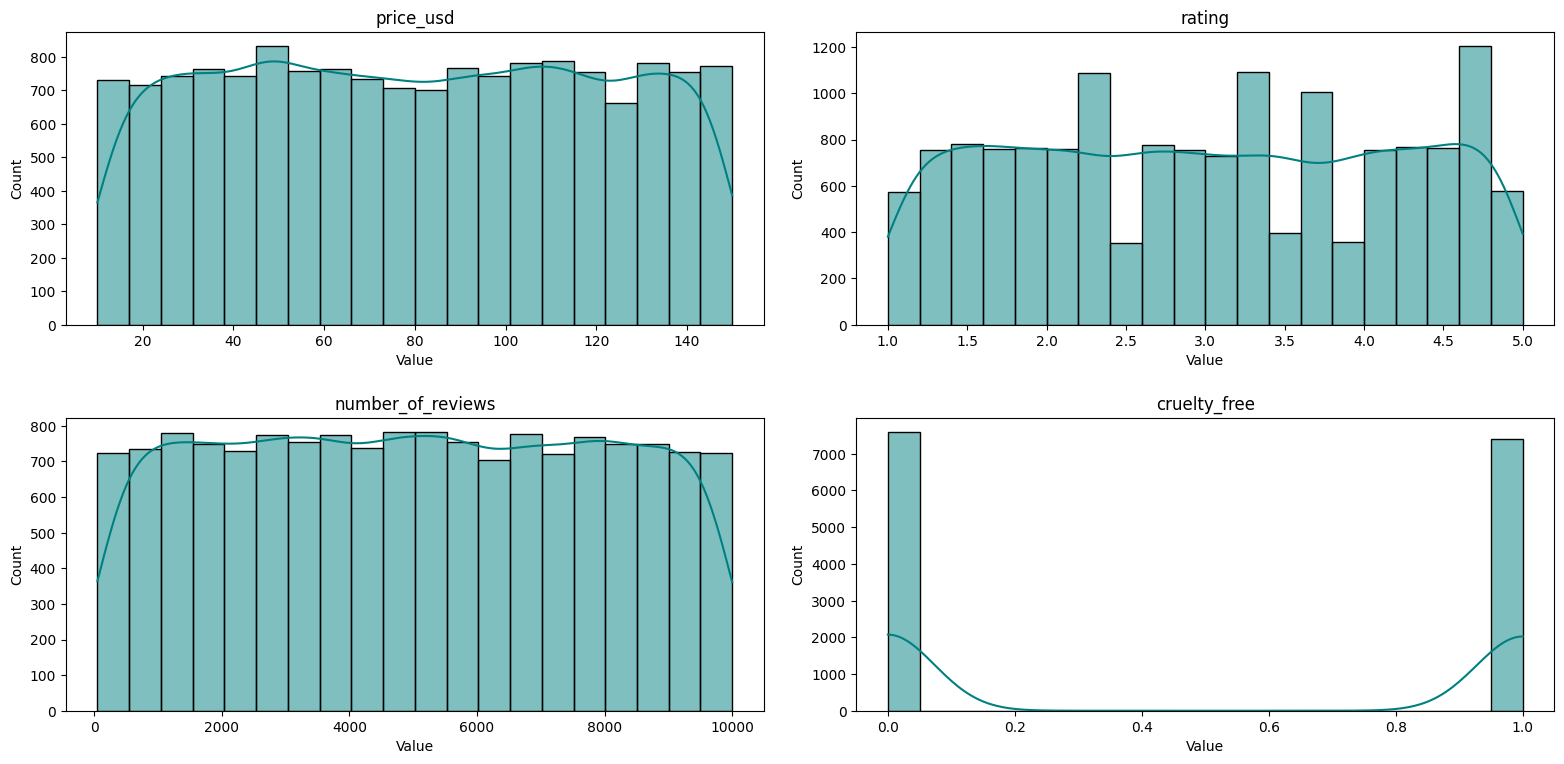

In [10]:
# numerical data distribution: histogram
def plot_histogram(df, feats_arr):
  n_cols = 2
  n_rows = int(np.ceil(len(feats_arr)/n_cols))

  fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*4))

  # flatten axes for easier iteration
  axes = axes.flatten()

  # histogram plotting
  for i, feature in enumerate(feats_arr):
    ax=axes[i]
    sns.histplot(x=df[feature], ax=ax, bins=20, kde=True, color='teal')
    ax.set_title(feature)
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')

  # remove unused subplots if exists
  for j in range(len(feats_arr), len(axes)):
    fig.delaxes(axes[j]) # remove empty axes

  plt.tight_layout(pad=2.0)
  plt.show()

# function call
plot_histogram(df, num_cols)

> Visualisasi histogram digunakan untuk melihat distribusi data numerik, yaitu `price_usd`, `rating`, `number_of_reviews`, dan `cruelty_free` (biner). Terlihat bahwa distribusi data **cukup seragam** (*uniform*). Hal ini menunjukkan bahwa tidak ada data yang mendominasi di satu sisi (nilai ekstrem/*outliers*). Informasi ini penting dalam menentukan pendekatan pada tahap *data preprocessing*, misalkan ketika mengatasi *outliers* atau melakukan imputasi terhadap *missing values* jika ada.

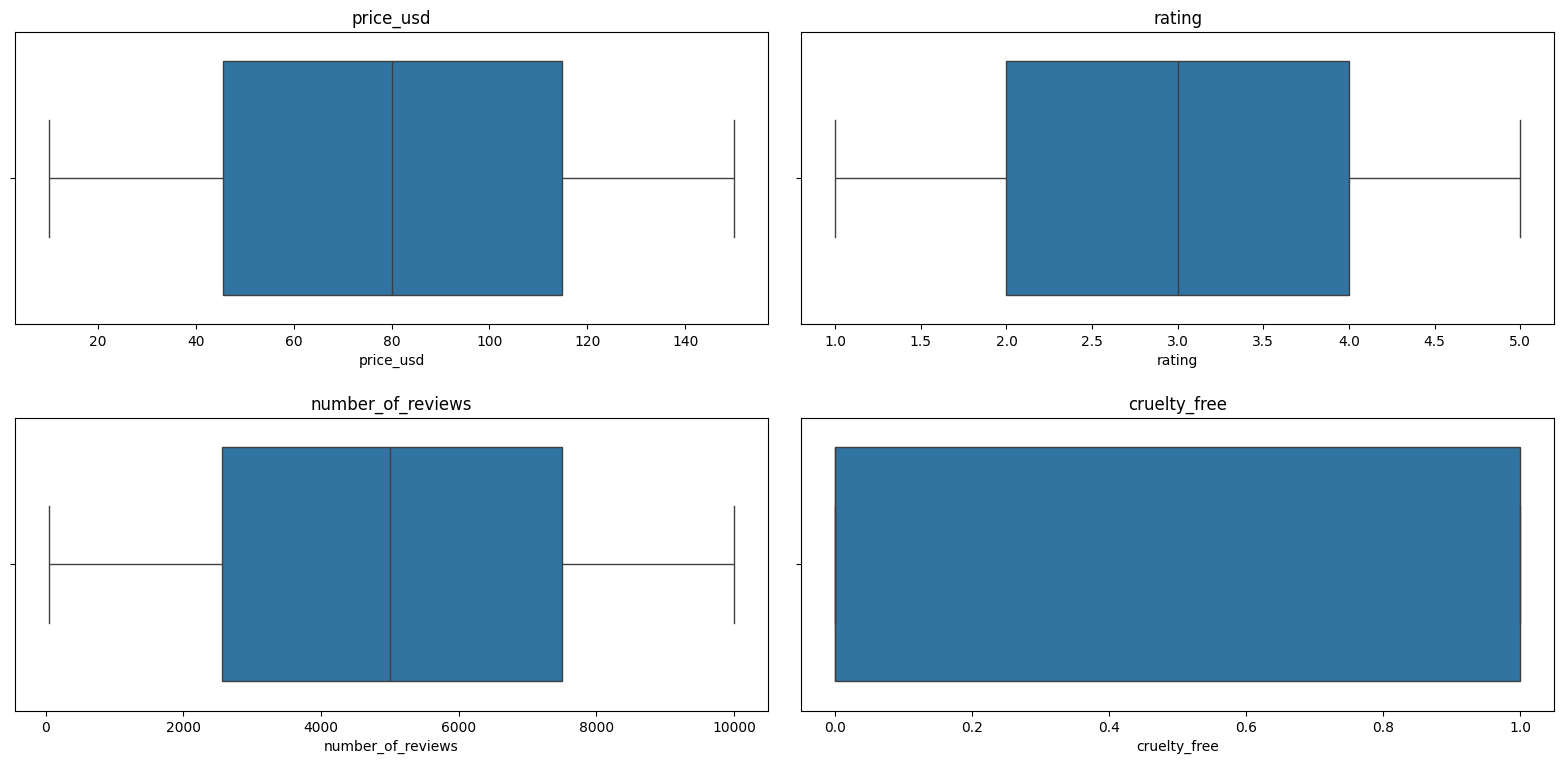

In [11]:
# outliers visualization: boxplot
def plot_outliers(df, feats_arr):
  n_cols = 2
  n_rows = int(np.ceil(len(feats_arr)/n_cols))

  fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*4))

  # flatten axes for easier iteration
  axes = axes.flatten()

  # boxplot plotting
  for i, feature in enumerate(feats_arr):
    ax = axes[i]
    sns.boxplot(x=df[feature], ax=ax)
    ax.set_title(feature)

  # remove unused subplots if exists
  for j in range(len(feats_arr), len(axes)):
    fig.delaxes(axes[j]) # remove empty axes

  plt.tight_layout(pad=2.0)
  plt.show()

# function call
plot_outliers(df, num_cols)

> Visualisasi boxplot menunjukkan bahwa keempat data numerik berada dalam rentang interkuartil (IQR) sehingga tidak memunculkan nilai ekstrem atau *outliers*. Hal ini sejalan dengan analisis berdasarkan histogram.

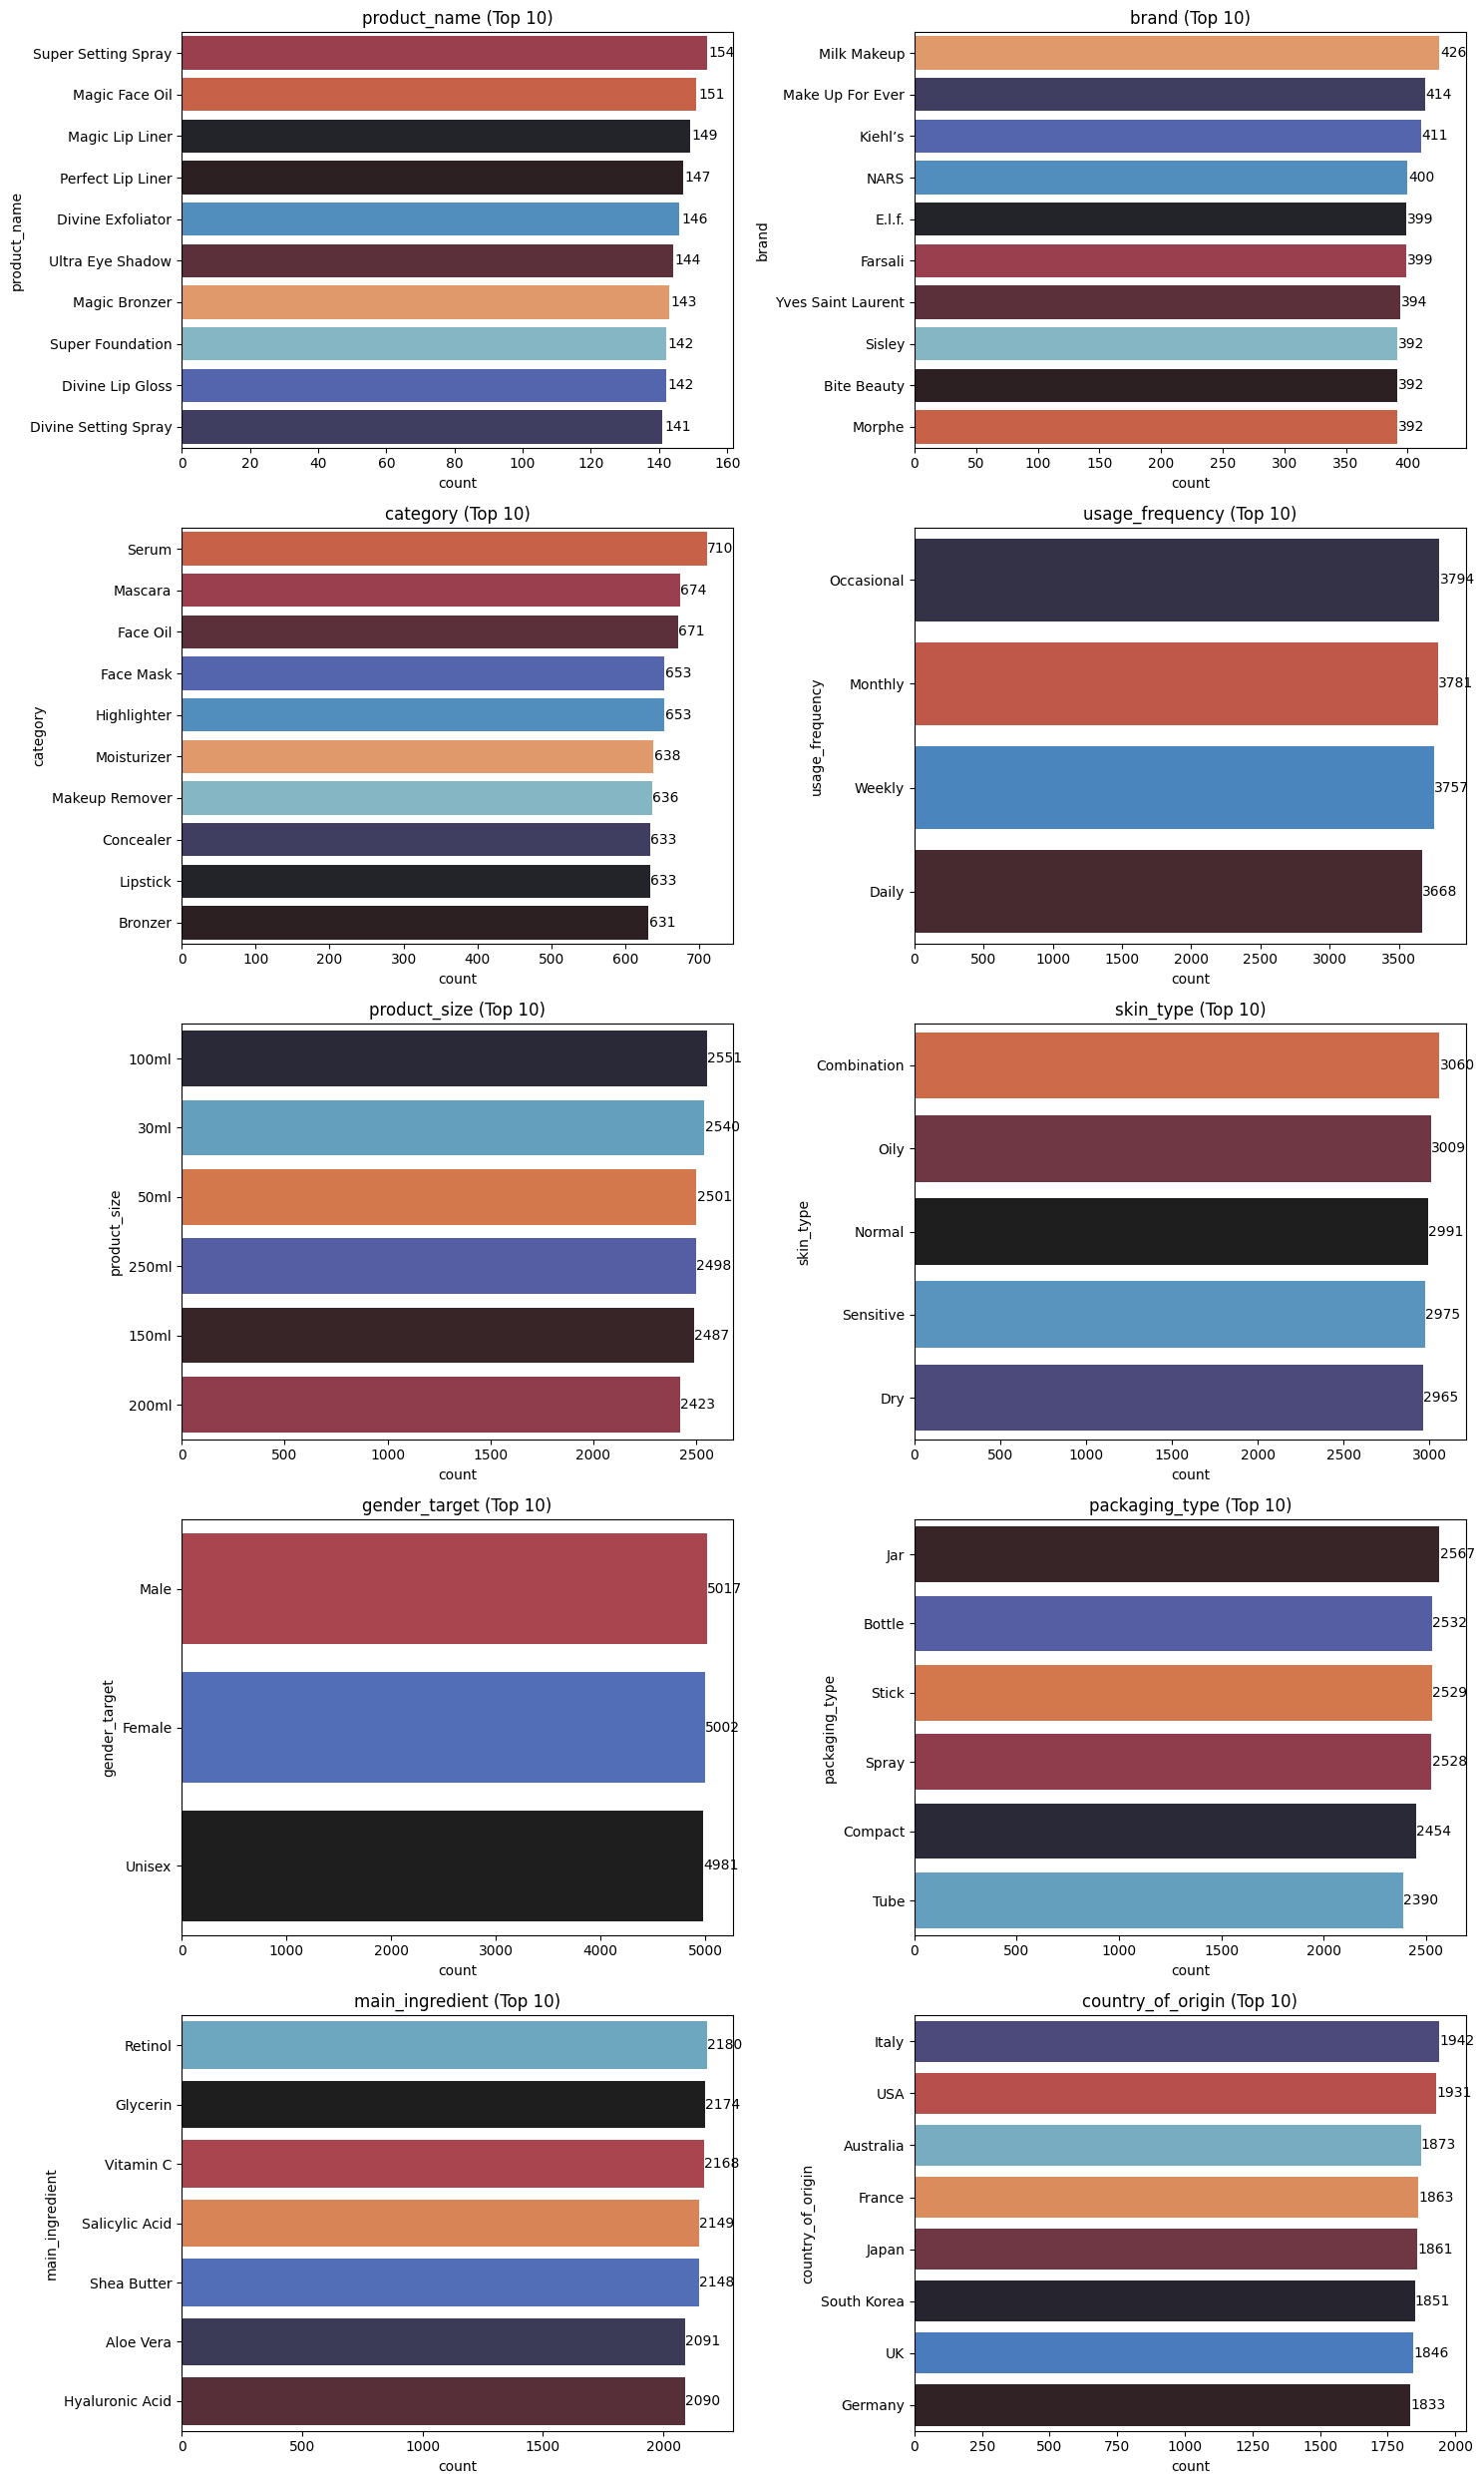

In [12]:
# categorical data distribution: countplot
def plot_cat_dist(df, feats_arr):
  n_cols = 2
  n_rows = int(np.ceil(len(feats_arr)/n_cols))

  fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*5))

  # flatten axes for easier iteration
  axes = axes.flatten()

  for i, feature in enumerate(feats_arr):
    # display only the top 10 values
    top_10_data = df[feature].value_counts().nlargest(10)
    top_10_index = top_10_data.index

    # countplot
    ax = axes[i]
    sns.countplot(y=feature,
                  data=df[df[feature].isin(top_10_index)],
                  ax=ax,
                  order=top_10_index,
                  hue=feature,
                  palette='icefire'
                  )
    ax.set_title(f'{feature} (Top 10)', fontsize=12)

    # add labels to each bar
    for p in ax.patches:
      width = p.get_width() # get the value (length) of the bar
      y_center = p.get_y() + p.get_height() / 2 # position the label at the center (vertically)

      ax.text(width + 0.5,
              y_center,
              f'{int(width)}',
              ha='left', va='center', fontsize=10)

  # remove unused subplots if exists
  for j in range(len(feats_arr), len(axes)):
    fig.delaxes(axes[j]) # remove empty axes

  plt.tight_layout()
  plt.show()

# function call
plot_cat_dist(df, cat_cols)

> Visualisasi countplot dilakukan pada kolom kategorikal seperti `product_name`, `brand`, `category`, `usage_frequency`, `product_size`, `skin_type`, `gender_target`, `packaging_type`, dan `country_of_origin`. Visualisasi hanya menampilkan hingga 10 data terbanyak berdasarkan jumlahnya untuk memastikan keterbacaan data. Distribusi seluruh fitur cukup merata (*uniform*) dengan tidak ada nilai unik yang terlalu dominan. Hal ini mengindikasikan bahwa data tidak mengalami ketidakseimbangan (*imbalance*) yang berlebihan sehingga tidak diperlukan penanganan khusus seperti *resampling*.

## **Data Preprocessing**

> Pada bagian ini dilakukan berbagai tahapan *data preprocessing*, yaitu:
- Memeriksa dan menangani ***missing values***
- Memeriksa dan menangani **typo atau inkonsistensi data**
- Memeriksa dan menangani ***duplicated data***
- Melakukan rekayasa fitur (***feature extraction***)
- Melakukan **normalisasi teks**

> Seluruh tahapan ini dilakukan untuk memastikan data yang digunakan pada tahapan pemodelan sudah bersih dan layak digunakan guna meningkatkan performa model.

### **Missing Values**

In [13]:
# check the presence missing values
df.isnull().sum()

,0
product_name,0
brand,0
category,0
usage_frequency,0
price_usd,0
rating,0
number_of_reviews,0
product_size,0
skin_type,0
gender_target,0


> Proses pemeriksaan *missing values* menggunakan sintaks `df.isnull().sum()`. Tabel di atas menunjukkan bahwa semua kolom tidak memiliki *missing values* yang terlihat dari nilai 0 di seluruh kolom. Dengan demikian, tidak diperlukan penanganan lebih lanjut untuk hal ini.

### **Typos/Inconsistencies**

In [14]:
# check for typos or inconsistencies
for feat in cat_cols:
  unique_values = df[feat].sort_values().unique() # sort the unique values alphabetically
  print(f'Unique values of {feat}:')
  print(unique_values)
  print(f'Total unique values: {len(unique_values)}')
  print()

Unique values of product_name:
['Divine BB Cream' 'Divine Blush' 'Divine Bronzer' 'Divine CC Cream'
 'Divine Cleanser' 'Divine Concealer' 'Divine Contour' 'Divine Exfoliator'
 'Divine Eye Shadow' 'Divine Eyeliner' 'Divine Face Mask'
 'Divine Face Oil' 'Divine Foundation' 'Divine Highlighter'
 'Divine Lip Gloss' 'Divine Lip Liner' 'Divine Lipstick'
 'Divine Makeup Remover' 'Divine Mascara' 'Divine Moisturizer'
 'Divine Powder' 'Divine Primer' 'Divine Serum' 'Divine Setting Spray'
 'Magic BB Cream' 'Magic Blush' 'Magic Bronzer' 'Magic CC Cream'
 'Magic Cleanser' 'Magic Concealer' 'Magic Contour' 'Magic Exfoliator'
 'Magic Eye Shadow' 'Magic Eyeliner' 'Magic Face Mask' 'Magic Face Oil'
 'Magic Foundation' 'Magic Highlighter' 'Magic Lip Gloss'
 'Magic Lip Liner' 'Magic Lipstick' 'Magic Makeup Remover' 'Magic Mascara'
 'Magic Moisturizer' 'Magic Powder' 'Magic Primer' 'Magic Serum'
 'Magic Setting Spray' 'Perfect BB Cream' 'Perfect Blush'
 'Perfect Bronzer' 'Perfect CC Cream' 'Perfect Clean

> Pemeriksaan terhadap typo dilakukan dengan melihat nilai unik pada setiap data kategorikal. Setelah diperiksa satu-per-satu, tidak ditemukan adanya typo atau kesalahan penulisan sehingga tidak perlu ada perbaikan untuk kasus ini. Dengan melihat data ini, terlihat bahwa nama produk memuat nama kategori produk. Hal ini memungkinkan pemeriksaan terhadap inkonsistensi data; apakah setiap produk sudah termasuk pada kategori yang sesuai.

In [15]:
# check any inconsistencies in product category
df[['product_name', 'category', 'brand']]

,product_name,category,brand
0,Ultra Face Mask,Blush,Drunk Elephant
1,Ultra Lipstick,Makeup Remover,Laura Mercier
2,Ultra Serum,Highlighter,Natasha Denona
3,Divine Serum,Face Mask,Ilia Beauty
4,Super Foundation,Highlighter,Charlotte Tilbury
...,...,...,...
14995,Magic Eyeliner,Face Mask,Patrick Ta
14996,Perfect Powder,Serum,Farsali
14997,Magic Serum,Highlighter,Kiehl’s
14998,Magic Mascara,Powder,Perricone MD


> Terlihat bahwa hampir seluruh data tidak berada di kategori yang sesuai. Selanjutnya, diambil satu data untuk memastikan permasalahan ini valid.

In [16]:
# confirm inconsistencies by testing one product
df.loc[df['product_name'] == 'Magic Eyeliner', ['product_name', 'category', 'brand']]

,product_name,category,brand
99,Magic Eyeliner,Blush,Milk Makeup
142,Magic Eyeliner,CC Cream,Shiseido
494,Magic Eyeliner,BB Cream,Tatcha
648,Magic Eyeliner,Blush,Clinique
705,Magic Eyeliner,Eye Shadow,Glossier
...,...,...,...
14534,Magic Eyeliner,Face Mask,Ilia Beauty
14583,Magic Eyeliner,Powder,Tarte
14851,Magic Eyeliner,Face Oil,Drunk Elephant
14965,Magic Eyeliner,Mascara,NARS


> Diambil contoh produk `Magic Eyeliner`. Seharusnya produk ini berada di kategori `Eyeliner`, tetapi terlihat bahwa produk ini tersebar pada berbagai kategori berbeda. Hal ini tentunya merupakan kesalahan yang jika tidak diperbaiki dapat **mendistorsi hasil rekomendasi** yang menggunakan pendekatan *content-based filtering* sehingga berpotensi menghasilkan rekomendasi yang kurang sesuai.

In [17]:
# function to fix inconsistencies by extracting the category from product name
def extract_category(product_name, categories):
  name = product_name.lower()

  for category in categories:
    if category in name:
      return category.title() # convert to title case
  return 'Unknown'

# apply fix
categories = df['category'].str.lower().unique()
df['category'] = df['product_name'].apply(lambda x: extract_category(x, categories))

In [18]:
# recheck fix using the same example
df.loc[df['product_name'] == 'Magic Eyeliner', ['product_name', 'category', 'brand']]

,product_name,category,brand
99,Magic Eyeliner,Eyeliner,Milk Makeup
142,Magic Eyeliner,Eyeliner,Shiseido
494,Magic Eyeliner,Eyeliner,Tatcha
648,Magic Eyeliner,Eyeliner,Clinique
705,Magic Eyeliner,Eyeliner,Glossier
...,...,...,...
14534,Magic Eyeliner,Eyeliner,Ilia Beauty
14583,Magic Eyeliner,Eyeliner,Tarte
14851,Magic Eyeliner,Eyeliner,Drunk Elephant
14965,Magic Eyeliner,Eyeliner,NARS


> Untuk mengatasi permasalahan tersebut, dibuat fungsi `extract_category()` yang mengambil nama kategori pada nama produk sebagai landasan penempatan kategori produk yang sesuai. Terlihat pada contoh yang sama (`Magic Eyeliner`), produk sudah berada di kategori yang sesuai (`Eyeliner`).

### **Duplicated Data**

In [19]:
# check the presence of duplicated data
df.duplicated().sum()

np.int64(0)

> Pemeriksaan duplikasi data dilakukan menggunakan sintaks `df.duplicated().sum()`. Hasil menunjukkan nilai 0, yang berarti tidak terdapat data duplikat dalam *dataset*. Oleh karena itu, tidak ada tindakan khusus yang diperlukan.

### **Feature Extraction**

> Pada bagian ini dilakukan *feature extraction*, yaitu dengan membuat fitur baru hasil penggabungan atau ekstraksi data dari fitur lain untuk memperluas informasi yang berguna.

In [20]:
# extract the numeric size and remove the unit
df['product_size_(ml)'] = df['product_size'].str.extract(r'(\d+)').astype(int)

# remove column product_size
df.drop('product_size', axis=1, inplace=True)

> Rekayasa fitur dilakukan terhadap fitur `product_size` untuk mengekstraksi data ukuran produk (netto) sehingga menghasilkan satu kolom baru `product_size_(ml)` bertipe integer. Hal ini dilakukan karena setiap produk terukur dalam milimiter sehingga tidak diperlukan kolom terpisah untuk unit. Dengan begitu, tidak diperlukan *encoding* lebih lanjut terhadap data ukuran produk. Fitur `product_size` kemudian dihapus dari dataframe.

In [21]:
# combine the product name and the brand to create a unique product id
df['unique_product_id'] = df['product_name'] + '_' + df['brand']
df['unique_product_id']

,unique_product_id
0,Ultra Face Mask_Drunk Elephant
1,Ultra Lipstick_Laura Mercier
2,Ultra Serum_Natasha Denona
3,Divine Serum_Ilia Beauty
4,Super Foundation_Charlotte Tilbury
...,...
14995,Magic Eyeliner_Patrick Ta
14996,Perfect Powder_Farsali
14997,Magic Serum_Kiehl’s
14998,Magic Mascara_Perricone MD


> Fitur kedua yang dihasilkan merupakan penggabungan `product_name` dan `brand` untuk membentuk sebuah *identifier* unik bagi setiap produk. Hal ini dilakukan karena satu nama produk dapat dimiliki oleh lebih dari satu *brand*, terutama mengingat bahwa *dataset* yang digunakan bersifat sintetis. Penggunaan *identifier* ini penting agar proses penghapusan duplikat berdasarkan `product_name` pada saat perhitungan *cosine similarity* tidak secara keliru menghapus data produk lain yang relevan.

In [22]:
# recheck dataset columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_name       15000 non-null  object 
 1   brand              15000 non-null  object 
 2   category           15000 non-null  object 
 3   usage_frequency    15000 non-null  object 
 4   price_usd          15000 non-null  float64
 5   rating             15000 non-null  float64
 6   number_of_reviews  15000 non-null  int64  
 7   skin_type          15000 non-null  object 
 8   gender_target      15000 non-null  object 
 9   packaging_type     15000 non-null  object 
 10  main_ingredient    15000 non-null  object 
 11  cruelty_free       15000 non-null  int64  
 12  country_of_origin  15000 non-null  object 
 13  product_size_(ml)  15000 non-null  int64  
 14  unique_product_id  15000 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1.7+ MB


> Setelah *feature extraction*, *dataset* `df` memiliki total 15 kolom.

### **Text Normalization**

> Tahapan normalisasi teks dilakukan untuk memastikan keseragaman format teks sebelum masuk ke tahap pemodelan. Proses ini meliputi:
- Mengubah seluruh huruf menjadi ***lowercase***
- **Menghapus *whitespace***
- **Menghilangkan tanda baca** dan karakter non-alfabet lainnya

> Langkah ini bertujuan untuk menghindari duplikasi dan inkonsistensi yang dapat memengaruhi hasil pemodelan berbasis teks.

In [23]:
# text normalization
df_clean = df.copy()

cat_cols = df_clean.select_dtypes('object').columns # redefine categorical columns
for col in cat_cols:
  df_clean[col] = df_clean[col].str.strip().str.lower() # remove whitespaces and convert to lowercase

  # remove punctuations except for the underscore in unique_product_id
  if col != 'unique_product_id':
    df_clean[col] = df_clean[col].str.replace(r'[^\w\s_]', '', regex=True)
  else:
    df_clean[col] = df_clean[col].str.replace(r'[^\w\s]', '', regex=True)

# display result
df_clean.head(10)

,product_name,brand,category,usage_frequency,price_usd,rating,number_of_reviews,skin_type,gender_target,packaging_type,main_ingredient,cruelty_free,country_of_origin,product_size_(ml),unique_product_id
0,ultra face mask,drunk elephant,face mask,weekly,67.85,1.4,686,sensitive,female,tube,retinol,0,australia,30,ultra face mask_drunk elephant
1,ultra lipstick,laura mercier,lipstick,occasional,116.43,4.2,5483,dry,unisex,bottle,shea butter,0,uk,250,ultra lipstick_laura mercier
2,ultra serum,natasha denona,serum,daily,90.84,1.6,5039,sensitive,male,compact,aloe vera,1,italy,100,ultra serum_natasha denona
3,divine serum,ilia beauty,serum,occasional,55.17,3.2,6202,normal,male,tube,glycerin,1,south korea,250,divine serum_ilia beauty
4,super foundation,charlotte tilbury,foundation,occasional,140.56,1.7,297,oily,female,compact,glycerin,0,germany,100,super foundation_charlotte tilbury
5,super eye shadow,danessa myricks,eye shadow,weekly,135.82,3.2,9405,sensitive,female,compact,glycerin,1,uk,150,super eye shadow_danessa myricks
6,super lip gloss,bourjois,lip gloss,monthly,148.99,2.5,2423,normal,female,jar,hyaluronic acid,1,germany,250,super lip gloss_bourjois
7,ultra cleanser,bourjois,cleanser,daily,21.43,4.3,8032,sensitive,male,bottle,vitamin c,1,italy,200,ultra cleanser_bourjois
8,magic highlighter,it cosmetics,highlighter,occasional,113.09,3.3,2468,combination,unisex,compact,vitamin c,1,germany,200,magic highlighter_it cosmetics
9,perfect bronzer,fenty beauty,bronzer,weekly,133.57,4.4,4127,dry,female,compact,hyaluronic acid,0,japan,150,perfect bronzer_fenty beauty


In [24]:
# clean categories preserve full phrase
df_clean['category_clean'] = df_clean['category'].str.replace(' ', '_') # clean categories preserve full phrase

> Penulisan setiap kategori juga diperbaiki, yakni dengan mengganti spasi dengan *underscore* (_) untuk mempertahankan setiap kategori secara utuh. Hal ini dilakukan agar ketika dilakukan *text embedding*, kategori seperti 'bb cream' atau 'lip liner' tidak menjadi dua kata terpisah.

## **Modeling: Content-Based Filtering**

> Model rekomendasi pertama menggunakan pendekatan ***content-based filtering*** yang memanfaatkan informasi kategori produk dan tipe kulit pengguna. Model ini menerima input berupa nama produk, nama brand, dan tipe kulit. Tahapan berikutnya adalah:
- *Filtering* terhadap produk berdasarkan kategori yang sama dengan produk input
- *Filtering* berdasarkan tipe kulit user
- Perhitungan skor kemiripan (*similarity score*) untuk memberikan rekomendasi top-N produk yang paling relevan.

### **TF-IDF Vectorizer (Embedding)**

In [25]:
# drop duplicates based on product_name
unique_prod_df = df_clean.drop_duplicates(subset='unique_product_id', keep='first').reset_index(drop=True)
unique_prod_df

,product_name,brand,category,usage_frequency,price_usd,rating,number_of_reviews,skin_type,gender_target,packaging_type,main_ingredient,cruelty_free,country_of_origin,product_size_(ml),unique_product_id,category_clean
0,ultra face mask,drunk elephant,face mask,weekly,67.85,1.4,686,sensitive,female,tube,retinol,0,australia,30,ultra face mask_drunk elephant,face_mask
1,ultra lipstick,laura mercier,lipstick,occasional,116.43,4.2,5483,dry,unisex,bottle,shea butter,0,uk,250,ultra lipstick_laura mercier,lipstick
2,ultra serum,natasha denona,serum,daily,90.84,1.6,5039,sensitive,male,compact,aloe vera,1,italy,100,ultra serum_natasha denona,serum
3,divine serum,ilia beauty,serum,occasional,55.17,3.2,6202,normal,male,tube,glycerin,1,south korea,250,divine serum_ilia beauty,serum
4,super foundation,charlotte tilbury,foundation,occasional,140.56,1.7,297,oily,female,compact,glycerin,0,germany,100,super foundation_charlotte tilbury,foundation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,ultra makeup remover,rms beauty,makeup remover,occasional,20.29,5.0,9026,combination,female,jar,salicylic acid,0,australia,30,ultra makeup remover_rms beauty,makeup_remover
4568,ultra foundation,too faced,foundation,weekly,134.66,3.5,9550,oily,female,bottle,shea butter,0,japan,250,ultra foundation_too faced,foundation
4569,magic eye shadow,it cosmetics,eye shadow,occasional,125.77,3.7,3469,dry,unisex,jar,hyaluronic acid,1,germany,100,magic eye shadow_it cosmetics,eye_shadow
4570,perfect powder,too faced,powder,occasional,60.26,1.2,1179,normal,male,stick,vitamin c,1,italy,30,perfect powder_too faced,powder


> Sebelum melakukan perhitungan *cosine similarity* dan *modeling*, langkah awal yang dilakukan adalah memastikan bahwa tidak terdapat duplikat `product_name` dalam data. Hal ini penting karena *cosine similarity* menghitung kemiripan antarproduk secara berpasangan. Adanya data nama produk yang duplikat dapat menyebabkan rekomendasi yang redundan atau bias, matriks kemiripan yang tidak akurat, hingga kesalahan dalam pemetaan indeks produk.

In [26]:
# initialize embedding
tfidf = TfidfVectorizer()

# fit and transform category data into matrix
tfidf_matrix = tfidf.fit_transform(unique_prod_df['category_clean'])

# check the matrix shape
tfidf_matrix.shape

(4572, 24)

> Untuk merepresentasikan fitur dari setiap kategori produk, digunakan pendekatan **TF-IDF Vectorizer**. Teknik ini menghasilkan sebuah matriks yang mencerminkan pentingnya sebuah kata (fitur) dalam setiap kategori yang kemudian digunakan untuk menghitung kemiripan antarproduk berdasarkan kategorinya.

In [27]:
# map arrays from integer to strings (display the categories)
categories = tfidf.get_feature_names_out()
categories

array(['bb_cream', 'blush', 'bronzer', 'cc_cream', 'cleanser',
       'concealer', 'contour', 'exfoliator', 'eye_shadow', 'eyeliner',
       'face_mask', 'face_oil', 'foundation', 'highlighter', 'lip_gloss',
       'lip_liner', 'lipstick', 'makeup_remover', 'mascara',
       'moisturizer', 'powder', 'primer', 'serum', 'setting_spray'],
      dtype=object)

In [28]:
# create a new dataframe that displays the matrix along with the categories
pd.DataFrame(
    tfidf_matrix.todense(), # convert vectors to matrix
    columns=categories, # categories as columns
    index=unique_prod_df['unique_product_id'] # product name as rows
).sample(10, axis=0).sample(24, axis=1) # sample all categories and 10 random products

,cleanser,concealer,foundation,serum,setting_spray,eyeliner,makeup_remover,bronzer,bb_cream,face_oil,...,cc_cream,moisturizer,powder,eye_shadow,lip_gloss,primer,blush,exfoliator,lip_liner,contour
unique_product_id,,,,,,,,,,,,,,,,,,,,,
magic blush_colourpop,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
magic serum_farsali,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
perfect highlighter_fenty beauty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
super face oil_tatcha,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
divine moisturizer_morphe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
divine powder_elf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
super eyeliner_sisley,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
perfect mascara_juvias place,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ultra eye shadow_pat mcgrath labs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


> Berdasarkan beberapa contoh data, terlihat bahwa produk telah terasosiasi dengan kategori yang sesuai. Sebagai contoh, produk 'divine lip gloss' memiliki skor korelasi sebesar 1 terhadap kategori `lip gloss`, yang menandakan representasi fitur TF-IDF bekerja sebagaimana mestinya.

### **Cosine Similarity**

> Proses selanjutnya adalah menghitung derajat kemiripan antarproduk berdasarkan representasi nama produk yang telah di-*vectorize*. Hasil dari proses ini akan digunakan untuk mencari kandidat produk yang layak direkomendasikan berdasarkan skor kemiripannya terhadap input produk (*anchor product*).

In [29]:
# compute the cosine similarity between all products
cos_sim = cosine_similarity(tfidf_matrix)
cos_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [30]:
# create a new dataframe to show the cosine similarity between products
cos_sim_df = pd.DataFrame(cos_sim, columns=unique_prod_df['unique_product_id'], index=unique_prod_df['unique_product_id'])

# display the df shape
cos_sim_df.shape

(4572, 4572)

In [31]:
# check the similarity score of some random products
cos_sim_df.sample(15, axis=0).sample(15, axis=1)

unique_product_id,magic makeup remover_perricone md,magic cleanser_ilia beauty,divine eyeliner_urban decay,perfect eye shadow_morphe,magic blush_bobby brown,magic concealer_milk makeup,perfect mascara_rms beauty,ultra bronzer_perricone md,divine moisturizer_sisley,divine makeup remover_too faced,super serum_rare beauty,magic bronzer_rms beauty,divine serum_kylie cosmetics,divine cc cream_elf,super bronzer_kvd beauty
unique_product_id,,,,,,,,,,,,,,,
ultra face mask_colourpop,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
magic powder_yves saint laurent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
perfect face oil_patrick ta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
divine lip liner_rare beauty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
magic bb cream_morphe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
divine setting spray_sisley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
divine mascara_too faced,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ultra eye shadow_kiehls,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
magic exfoliator_anastasia beverly hills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


> Dari contoh data *cosine similarity*, dapat dilihat bahwa produk-produk dalam kategori yang sama akan memiliki skor kemiripan tertinggi (1.0), seperti pada kasus `magic serum_urban decay` dan `divine serum_too faced` yang keduanya berada dalam kategori serum.

### **Model Development**

In [32]:
# function to recommend similar products (in the same category) while taking into account the user's skin type
def recommend_similar_product(top_n=5):

  # get input from user
  product_name = input('Enter a product name: ').strip().lower()
  brand_anchor = input('From which brand?: ').strip().lower()
  user_skin_type = input('What is your skin type (e.g., sensitive, dry, normal, oily, combination): ').strip().lower()

  # readjust product id
  product_id = f"{product_name}_{brand_anchor}"

  # raise error if the selected product is not found in database
  if product_id not in cos_sim_df.index:
    print(f'Product not found: {product_id}')
    return None, None, []

  # get the similarity score for the selected product
  sim_scores = cos_sim_df.loc[product_id].sort_values(ascending=False) # sort products based on the similarity score in descending order
  sim_scores = sim_scores.drop(product_id) # exclude the selected product

  # identify the product's category
  product_category = unique_prod_df.loc[unique_prod_df['unique_product_id'] == product_id, 'category_clean'].iloc[0]

  # filter products that are in the same category and match the user's skin type
  mask = (unique_prod_df['category_clean'] == product_category) & \
         (unique_prod_df['skin_type'].str.contains(user_skin_type, case=False, na=False)), # ignore case and nan for skin type

  filtered_ids = unique_prod_df.loc[mask, 'unique_product_id']

  # get the similarity scores of the compatible products
  recommendations = sim_scores[sim_scores.index.isin(filtered_ids)].head(top_n)

  # fallback: if no compatible products found, recommend based on the product's category only
  if recommendations.empty:
     print(f'\nNo similar products found for skin type "{user_skin_type}". Showing similar products within the same category instead:')
     category_ids = unique_prod_df.loc[unique_prod_df['category_clean'] == product_category, 'unique_product_id']
     recommendations = sim_scores[sim_scores.index.isin(category_ids)].head(top_n)

  # format and display the recommendations
  recommended_data = []
  print(f"\nRecommended products for skin type '{user_skin_type.title()}' (Category: {product_category.replace('_', ' ').title()}):\n")

  for i, pid in enumerate(recommendations.index, start=1):
    product_info = unique_prod_df[unique_prod_df['unique_product_id'] == pid].iloc[0]

    brand = product_info['brand'] if pd.notna(product_info['brand']) else 'Unknown'
    price = f"${product_info['price_usd']:.2f}" if pd.notna(product_info['price_usd']) else 'N/A'
    size = product_info['product_size_(ml)'] if pd.notna(product_info['product_size_(ml)']) else 'N/A'
    package = product_info['packaging_type'] if pd.notna(product_info['packaging_type']) else 'Unknown'
    main_ingredient = product_info['main_ingredient'] if pd.notna(product_info['main_ingredient']) else 'Unknown'
    skin_type = product_info['skin_type'] if pd.notna(product_info['skin_type']) else 'Unknown'
    rating = product_info['rating'] if pd.notna(product_info['rating']) else 'N/A'

    # split the product name so it only includes the name (and not the brand)
    clean_prod_name = pid.rsplit('_', 1)[0].title()

    # system message
    print(f"{i}. {clean_prod_name} by {brand.title()}")
    print(f"    Price: {price}")
    print(f"    Package: {size}ml in {package}")
    print(f"    Main Ingredient: {main_ingredient}")
    print(f"    Most suitable for: {skin_type} skin")
    print(f"    Rating: {rating}\n")

    # store the data
    recommended_data.append({
        'product': clean_prod_name,
        'brand': brand,
        'skin_type': skin_type,
    })

  # additional info (useful for debugging)
  print('Additional info:')
  print(f'Similarity scores retrieved: {len(sim_scores)}')
  print(f'Filtered by skin type + category: {len(filtered_ids)}')
  print(f'Filtered similarity matches: {recommendations.shape[0]}')

  return product_id, user_skin_type, recommended_data

> Fungsi `recommend_similar_product()` menerima input berupa nama produk, *brand*, dan tipe kulit pengguna. Alur fungsi ini adalah sebagai berikut:
1. Menggabungkan nama produk dan brand untuk mencari produk acuan (*anchor product*)
2. Melakukan *filtering* terhadap produk lain berdasarkan kategori yang sama
3. Menyaring kembali data hasil *filtering* sebelumnya berdasarkan kecocokan tipe kulit
4. Mengurutkan hasil berdasarkan skor kemiripan
5. Mengembalikan top-N produk teratas sebagai rekomendasi.

> Jika tidak ditemukan produk lain dalam kategori tersebut yang sesuai dengan tipe kulit pengguna, model tetap memberikan rekomendasi dari kategori yang sama tanpa mempertimbangkan kecocokan tipe kulit.

In [33]:
# example for input
df.loc[df['product_name'] == 'Divine Moisturizer', ['product_name', 'brand', 'skin_type']]

,product_name,brand,skin_type
192,Divine Moisturizer,E.l.f.,Dry
356,Divine Moisturizer,Danessa Myricks,Dry
405,Divine Moisturizer,Danessa Myricks,Sensitive
580,Divine Moisturizer,Patrick Ta,Combination
596,Divine Moisturizer,Shiseido,Combination
...,...,...,...
14587,Divine Moisturizer,IT Cosmetics,Dry
14620,Divine Moisturizer,NARS,Normal
14770,Divine Moisturizer,Yves Saint Laurent,Sensitive
14946,Divine Moisturizer,Kiehl’s,Oily


In [34]:
# function call: product recommender
product_id, user_skin_type, recommended_data_1 = recommend_similar_product(top_n=10)

Enter a product name: divine moisturizer
From which brand?: kiehls
What is your skin type (e.g., sensitive, dry, normal, oily, combination): oily

Recommended products for skin type 'Oily' (Category: Moisturizer):

1. Divine Moisturizer by Tatcha
    Price: $114.12
    Package: 250ml in tube
    Main Ingredient: shea butter
    Most suitable for: oily skin
    Rating: 4.8

2. Super Moisturizer by Kylie Cosmetics
    Price: $129.16
    Package: 250ml in spray
    Main Ingredient: salicylic acid
    Most suitable for: oily skin
    Rating: 4.6

3. Ultra Moisturizer by Bobby Brown
    Price: $85.92
    Package: 200ml in tube
    Main Ingredient: salicylic acid
    Most suitable for: oily skin
    Rating: 2.8

4. Ultra Moisturizer by Drunk Elephant
    Price: $35.33
    Package: 100ml in stick
    Main Ingredient: shea butter
    Most suitable for: oily skin
    Rating: 5.0

5. Perfect Moisturizer by It Cosmetics
    Price: $145.04
    Package: 200ml in bottle
    Main Ingredient: vitamin 

> Sebagai contoh, ketika pengguna memberikan input 'divine moisturizer' dari brand 'kiehls' dengan tipe kulit 'oily', model akan mencari produk lain pada kategori `moisturizer` dan yang cocok untuk kulit berminyak. Berdasarkan parameter `top_n=5`, model menghasilkan 5 rekomendasi produk *moisturizer* untuk kulit berminyak dari total 36 produk dalam kategori yang sama setelah di-*filter*.

### **Model Evaluation**

In [35]:
# function to evaluate model using both precision@k and recall@k
def evaluate_model(product_id, user_skin_type, recommended_data):
  # null handling
  if not recommended_data:
    print("No recommendations to evaluate.")
    return 0.0, 0.0

  hits = 0
  k = len(recommended_data)

  # precision@k logic
  for rec in recommended_data:
    hit = unique_prod_df[
        (unique_prod_df['product_name'].str.lower() == rec['product'].lower()) &
        (unique_prod_df['brand'].str.lower() == rec['brand'].lower()) &
        (unique_prod_df['skin_type'].str.lower() == rec['skin_type'].lower())
    ]

    # increment if something matches
    if not hit.empty:
      hits += 1

  precision_at_k = hits / k if k > 0 else 0

  # recall@k logic
  product_category = unique_prod_df.loc[unique_prod_df['unique_product_id'] == product_id, 'category_clean'].iloc[0]
  relevant = unique_prod_df[
      (unique_prod_df['category_clean'] == product_category) &
      (unique_prod_df['skin_type'].str.contains(user_skin_type, case=False, na=False))
  ][['product_name', 'brand']].drop_duplicates()

  total_relevant = len(relevant)
  recall_at_k = hits / total_relevant if total_relevant > 0 else 0

  print(f'Precision@k: {precision_at_k:.2f}')
  print(f'Recall@k: {recall_at_k:.2f}')

> Fungsi `evaluate_model()` digunakan untuk mengevaluasi performa sistem rekomendasi menggunakan dua metrik utama, yaitu:

- **Precision@K**: Mengukur proporsi item yang relevan di antara *K* produk yang direkomendasikan.

- **Recall@K**: Mengukur proporsi item relevan yang berhasil direkomendasikan dari seluruh item relevan yang tersedia untuk pengguna.

> Kedua metrik ini digunakan untuk menilai seberapa **akurat** (precision) dan **menyeluruh** (recall) hasil rekomendasi model terhadap kebutuhan pengguna.


In [36]:
# function call: model evaluation
evaluate_model(product_id, user_skin_type, recommended_data_1)

Precision@k: 1.00
Recall@k: 0.28


> Pada pengujian pertama, sistem rekomendasi diuji menggunakan input produk **"Divine Moisturizer"** dengan tipe kulit pengguna *oily*. Model berhasil menampilkan **10 produk rekomendasi** yang berada dalam **kategori dan tipe kulit yang sama** dengan kebutuhan user.

> Hasil evaluasi metrik adalah sebagai berikut:
- **Precision@K = 1.0**  
  Nilai ini mengindikasikan seluruh produk yang direkomendasikan merupakan produk yang **relevan** dengan kebutuhan user (termasuk dalam kategori dan tipe kulit yang sesuai). Hal Ini menunjukkan bahwa sistem cukup akurat dalam memilih produk relevan dari total yang direkomendasikan.
- **Recall@K = 0.28**  
  Nilai recall yang cukup rendah menunjukkan bahwa **jumlah produk relevan yang berhasil ditampilkan** oleh sistem masih terbatas. Dalam kasus ini, sistem hanya berhasil menampilkan **10 dari total 36** produk yang dianggap relevan dalam dataset (dengan mempertimbangkan filter kategori dan tipe kulit).


## **Modeling: Clustering-Based Recommendations**

> Model rekomendasi kedua menggunakan pendekatan **clustering-based recommendation** dengan algoritma *unsupervised learning* **K-Means**. Algoritma ini mengelompokkan produk berdasarkan kemiripan beberapa fitur, seperti:
- `price_usd`
- `rating`
- `number_of_reviews`
- `category`
- `skin_type`
- `main_ingredient`

> Rekomendasi diberikan dari produk yang berada di **cluster yang sama** dengan kategori input, dengan penyesuaian lebih lanjut melalui *filtering* berdasarkan *kategori* dan *skin type* untuk menghasilkan hasil yang lebih personal dan relevan dengan kebutuhan pengguna.


In [37]:
# create a copy of the dataframe
df_cluster = unique_prod_df.copy()

# define used features in df_cluster and drop missing values (if exist)
features = ['category', 'skin_type', 'rating', 'price_usd', 'main_ingredient', 'number_of_reviews']
df_cluster = df_cluster[features + ['unique_product_id']].dropna()

# set index as unique_product_id
df_cluster.set_index('unique_product_id', inplace=True)

# display dataframe
df_cluster

,category,skin_type,rating,price_usd,main_ingredient,number_of_reviews
unique_product_id,,,,,,
ultra face mask_drunk elephant,face mask,sensitive,1.4,67.85,retinol,686
ultra lipstick_laura mercier,lipstick,dry,4.2,116.43,shea butter,5483
ultra serum_natasha denona,serum,sensitive,1.6,90.84,aloe vera,5039
divine serum_ilia beauty,serum,normal,3.2,55.17,glycerin,6202
super foundation_charlotte tilbury,foundation,oily,1.7,140.56,glycerin,297
...,...,...,...,...,...,...
ultra makeup remover_rms beauty,makeup remover,combination,5.0,20.29,salicylic acid,9026
ultra foundation_too faced,foundation,oily,3.5,134.66,shea butter,9550
magic eye shadow_it cosmetics,eye shadow,dry,3.7,125.77,hyaluronic acid,3469


> Langkah pertama adalah membuat salinan *dataframe* yang hanya memuat fitur-fitur penting, yaitu`category`, `skin_type`, `rating`, `price_usd`, `main_ingredient`, dan `number_of_reviews`. Index dataframe ini diatur menggunakan `unique_product_id` agar identitas setiap produk tetap jelas dan tidak hilang selama proses transformasi.

### **Preprocessing Pipeline**

In [38]:
# feature selection
num_cols = ['rating', 'number_of_reviews', 'price_usd']
cat_cols = ['category', 'main_ingredient', 'skin_type']

In [39]:
# preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

> Proses transformasi dilakukan dengan menggunakan `ColumnTransformer` untuk menangani dua tipe fitur:

- **Fitur numerik**: `rating`, `number_of_reviews`, `price_usd`, diproses menggunakan `StandardScaler()` untuk normalisasi.
- **Fitur kategorikal**: `category`, `main_ingredient`, `skin_type`, diproses menggunakan `OneHotEncoder()` untuk encoding nilai kategorikal.

### **Clustering Model (K-Means)**

In [40]:
# function to determine the optimum # of clusters based on elbow method & silhouette score
def det_best_cluster(df, min_cluster=2, max_cluster=10):
  range_of_clusters = range(min_cluster, max_cluster+1)
  inertia = []
  silhouette_scores = []

  for n_clusters in range_of_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(df)
    # inertias
    inertia.append(kmeans.inertia_)
    # silhouette scores
    score = silhouette_score(df, labels)
    silhouette_scores.append(score)

  # plot the elbow method and silhouette score side by side
  plt.figure(figsize=(14,6))

  # elbow method plot
  plt.subplot(1, 2, 1)
  plt.plot(range_of_clusters, inertia, marker='o', c='orange')
  plt.title('Elbow Method')
  plt.xlabel('# of Clusters')
  plt.ylabel('Inertia')

  # silhouette score plot
  plt.subplot(1, 2, 2)
  plt.plot(range_of_clusters, silhouette_scores, marker='o')
  plt.title('Silhouette Scores')
  plt.xlabel('# of Clusters')
  plt.ylabel('Silhouette Score')

  plt.show()

  print()

  # the optimum clusters based on the max silhouette score
  best_n_clusters_score = range_of_clusters[np.argmax(silhouette_scores)]

  # the optimum clusters based on the elbow point
  slope_changes = np.diff(inertia, 2)
  elbow_point = np.argmin(slope_changes) + 2

  best_n_clusters_elbow = range_of_clusters[np.argmax(inertia)]
  print(f'Best clusters (silhouette): {best_n_clusters_score}')
  print(f'Best clusters (elbow): {elbow_point}')

  return best_n_clusters_score, elbow_point

> Fungsi `det_best_cluster()` digunakan untuk membantu menentukan jumlah *cluster* optimal melalui dua pendekatan:

1. **Elbow Method**: Melihat titik "tekukan" (*elbow point*) pada grafik inertia untuk mengetahui kapan penambahan *cluster* tidak lagi memberi peningkatan signifikan.
2. **Silhouette Score**: Mengukur kualitas pemisahan antar *cluster* (semakin tinggi nilainya, semakin baik).

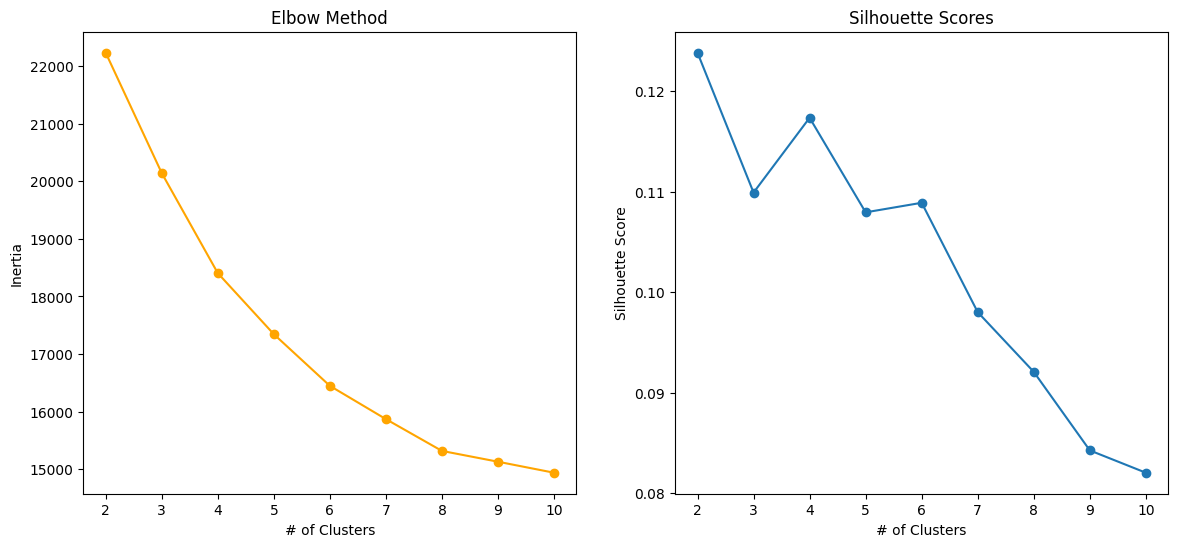


Best clusters (silhouette): 2
Best clusters (elbow): 8


In [41]:
# apply preprocessing and clustering
X_cluster = preprocessor.fit_transform(df_cluster)
best_score, elbow_point = det_best_cluster(X_cluster)

In [42]:
# compare the data if clusters = 2 or clusters = 8
for i in [2, 8]:
  kmeans = KMeans(n_clusters=i, random_state=42)
  labels = kmeans.fit_predict(X_cluster)
  df_cluster['cluster'] = labels
  display(df_cluster.groupby('cluster')[num_cols].mean())
  print()

,rating,number_of_reviews,price_usd
cluster,,,
0,3.045322,5138.624034,45.673704
1,2.957895,4894.538805,115.669376


,rating,number_of_reviews,price_usd
cluster,,,
0,3.949387,7735.795096,45.926637
1,1.883808,2602.574733,114.654822
2,2.116497,2552.442177,44.736259
3,4.044171,7267.978654,114.643186
4,4.083160,2772.685764,43.642465
5,1.962330,7602.598058,118.243922
6,1.902041,7355.773810,47.900289
7,3.952220,2312.840142,115.042060


> Berdasarkan hasil visualisasi, didapatkan jumlah *cluster* optimal berdasarkan *silhouette score* tertinggi adalah sebanyak 2, sedangkan berdasarkan *elbow method* adalah sebanyak 8. Berikut analisis perbandingan keduanya dan keputusan pemilihan jumlah cluster yang digunakan:

- **Cluster = 2**  
  - Silhouette Score tertinggi, tetapi hasil terlalu generik.
  - Hanya membedakan dua kelompok besar: produk **affordable** vs. **premium** dengan persebaran rating yang kurang jelas.
  
- **Cluster = 8**  
  - Memberikan segmentasi yang lebih detail, tetapi skor *silhouette* sangat rendah.
  - Berisiko menghasilkan *cluster* yang tumpang tindih atau tidak bermakna (*noisy*).

- **Cluster = 6**  
  - Dipilih sebagai solusi karena berada diantara keduanya.
  - Jumlah *cluster* tidak terlalu sedikit maupun terlalu banyak.
  - *Silhouette score* masih cukup baik untuk interpretasi dan segmentasi yang masuk akal.

In [43]:
# build model using 6 as number of clusters
kmeans = KMeans(n_clusters=6, random_state=42)
labels = kmeans.fit_predict(X_cluster)
df_cluster['cluster'] = labels + 1 # labeling starts from 1

In [44]:
# display result
df_cluster

,category,skin_type,rating,price_usd,main_ingredient,number_of_reviews,cluster
unique_product_id,,,,,,,
ultra face mask_drunk elephant,face mask,sensitive,1.4,67.85,retinol,686,3
ultra lipstick_laura mercier,lipstick,dry,4.2,116.43,shea butter,5483,4
ultra serum_natasha denona,serum,sensitive,1.6,90.84,aloe vera,5039,2
divine serum_ilia beauty,serum,normal,3.2,55.17,glycerin,6202,6
super foundation_charlotte tilbury,foundation,oily,1.7,140.56,glycerin,297,2
...,...,...,...,...,...,...,...
ultra makeup remover_rms beauty,makeup remover,combination,5.0,20.29,salicylic acid,9026,6
ultra foundation_too faced,foundation,oily,3.5,134.66,shea butter,9550,4
magic eye shadow_it cosmetics,eye shadow,dry,3.7,125.77,hyaluronic acid,3469,5


In [45]:
# check cluster distribution
df_cluster['cluster'].value_counts(normalize=True)

,proportion
cluster,
3,0.180227
2,0.171041
1,0.168416
6,0.167760
4,0.159668
5,0.152887


> Terlihat bahwa distribusi data pada keenam label sudah cukup seimbang.

In [46]:
# check clusters statistics
df_cluster.groupby('cluster')[num_cols].mean()

,rating,number_of_reviews,price_usd
cluster,,,
1,1.876623,7453.212987,55.785130
2,1.806010,3476.594629,113.945396
3,2.850000,2235.188107,40.166760
4,3.449452,7781.843836,119.804055
5,4.050501,2534.266094,109.810844
6,4.135724,6772.993481,47.429557


> Berikut adalah beberapa interpretasi segmentasi dari data statistik setiap kluster:

- **Cluster 6**: Produk *affordable* dengan rating tinggi (contoh: rating 4.14, harga sekitar \$47)
- **Cluster 5**: Produk premium dengan rating tinggi (contoh: rating 4.05, harga sekitar \$110)
- **Cluster 2**: Produk mahal dengan rating rendah
- **Cluster 1**: Produk populer namun memiliki rating rendah

> Segmentasi ini memberikan **klasterisasi *price-performance*** yang lebih baik dan distribusi produk yang seimbang sehingga dapat menghasilkan rekomendasi yang lebih kontekstual.

In [47]:
# function to recommend products within the similar cluster after filtering by category and skin type
def recommend_by_cluster(top_n=5):
  # get input from user
  category = input('Enter product category: ').strip().lower()
  user_skin_type = input('What is your skin type (e.g., sensitive, dry, normal, oily, combination): ').strip().lower()

  # filter products by category and skin type
  filtered_data = df_cluster[
      (df_cluster['category'].str.lower() == category) &
      (df_cluster['skin_type'].str.lower() == user_skin_type)
  ]

  # raise error if no filtered products found
  if filtered_data.empty:
    return f"No products found for category '{category}' and skin type '{user_skin_type}'"

  # find the most common cluster among the products
  most_common_cluster = filtered_data['cluster'].value_counts().idxmax()

  # get the products from the most common cluster
  cluster_subset = filtered_data[filtered_data['cluster'] == most_common_cluster]

  # sort products by rating and reviews
  top_products = cluster_subset.sort_values(by=['rating', 'number_of_reviews'], ascending=False).head(top_n)

  # print recommendations
  print(f"\nTop {top_n} '{category.title()}' products for '{user_skin_type.title()}' skin (Cluster {most_common_cluster}):\n")

  for i, (pid, row) in enumerate(top_products.iterrows(), start=1):
    prod_info = unique_prod_df.loc[unique_prod_df['unique_product_id'] == pid].iloc[0] # get the product information
    print(f"{i}. {prod_info['product_name'].title()} by {prod_info['brand'].title()}")
    print(f"    Category: {prod_info['category'].title()}, Rating: {prod_info['rating']}, Reviews: {prod_info['number_of_reviews']}")
    print(f"    Skin Type: {prod_info['skin_type'].title()}, Price: ${prod_info['price_usd']:.2f}")
    print(f"    Cluster: {row['cluster']}\n")

  return top_products

> Fungsi `recommend_by_cluster()` bertujuan untuk merekomendasikan produk berdasarkan hasil segmentasi *cluster* yang telah dibentuk. Alur kerjanya adalah sebagai berikut:

1. Menerima input berupa **kategori produk** dan **tipe kulit pengguna**.
2. Melakukan **filtering** data sesuai dengan kategori dan tipe kulit tersebut.
3. Mengidentifikasi **cluster terbanyak** dari hasil filter (*cluster* dominan).
4. Menyaring data lebih lanjut hanya pada produk yang berada di **cluster tersebut**.
5. Mengurutkan hasil berdasarkan **rating tertinggi** dan **jumlah review terbanyak**.
6. Mengembalikan rekomendasi sejumlah `top-n` produk yang paling relevan.

In [48]:
# function call: get recommendations per cluster
recommend_by_cluster()

Enter product category: face mask
What is your skin type (e.g., sensitive, dry, normal, oily, combination): sensitive

Top 5 'Face Mask' products for 'Sensitive' skin (Cluster 5):

1. Divine Face Mask by Milk Makeup
    Category: Face Mask, Rating: 4.8, Reviews: 5595
    Skin Type: Sensitive, Price: $112.12
    Cluster: 5

2. Ultra Face Mask by Becca
    Category: Face Mask, Rating: 4.8, Reviews: 3765
    Skin Type: Sensitive, Price: $102.98
    Cluster: 5

3. Magic Face Mask by Make Up For Ever
    Category: Face Mask, Rating: 4.8, Reviews: 1078
    Skin Type: Sensitive, Price: $62.29
    Cluster: 5

4. Super Face Mask by Anastasia Beverly Hills
    Category: Face Mask, Rating: 4.7, Reviews: 3264
    Skin Type: Sensitive, Price: $145.69
    Cluster: 5

5. Ultra Face Mask by Perricone Md
    Category: Face Mask, Rating: 4.7, Reviews: 1028
    Skin Type: Sensitive, Price: $61.47
    Cluster: 5



,category,skin_type,rating,price_usd,main_ingredient,number_of_reviews,cluster
unique_product_id,,,,,,,
divine face mask_milk makeup,face mask,sensitive,4.8,112.12,salicylic acid,5595,5
ultra face mask_becca,face mask,sensitive,4.8,102.98,aloe vera,3765,5
magic face mask_make up for ever,face mask,sensitive,4.8,62.29,glycerin,1078,5
super face mask_anastasia beverly hills,face mask,sensitive,4.7,145.69,retinol,3264,5
ultra face mask_perricone md,face mask,sensitive,4.7,61.47,shea butter,1028,5


> Sebagai contoh, jika pengguna memasukkan input **kategori**: `face mask` dan **tipe kulit**: `sensitive`, model akan menghasilkan daftar rekomendasi produk yang relevan dan populer untuk tipe kulit tersebut seperti hasil yang tertera di atas.

### **Model Evaluation**

In [49]:
# silhouette score
sil_score = silhouette_score(X_cluster, labels)
print(f'Silhouette Score: {sil_score:.4f}')

Silhouette Score: 0.1089


> Model menggunakan **silhouette score** sebagai metrik evaluasi kualitas *cluster*. Untuk konfigurasi `k = 6`, diperoleh nilai *silhouette* score sebesar **0.1089**.

> Walaupun terlihat kecil, hal ini masih dapat dimaklumi mengingat beberapa faktor yang mungkin memengaruhi rendahnya nilai *silhouette score*, seperti:
- **Dimensi data tinggi** (terutama akibat *encoding* fitur kategorikal menggunakan OneHotEncoder)
- ***Overlap* antarsegmen produk** (misalnya, produk yang sama cocok untuk beberapa tipe kulit atau kategori)
- **Noise pada data sintetis atau kurang representatifnya distribusi produk**
- **Distribusi harga dan rating yang tidak merata atau kurang jelas**
- dll.

> Dengan mempertimbangkan hal-hal tersebut, pemilihan `k = 6` tetap memberikan segmentasi yang cukup *interpretable* dan mendukung personalisasi rekomendasi yang terbilang baik.

## **Conclusion & Recommendation**

> Berikut adalah kesimpulan dari evaluasi dan pengujian terhadap kedua sistem rekomendasi yang dikembangkan serta saran perbaikan yang dapat dilakukan untuk meningkatkan performa model kedepannya:
1. **Content-Based Filtering**  
   Model ini menunjukkan performa **sangat baik dari sisi precision**, artinya produk yang direkomendasikan benar-benar relevan terhadap kebutuhan pengguna (berdasarkan kategori dan tipe kulit).  
   Namun, **nilai recall masih cukup rendah**, menunjukkan bahwa tidak semua produk relevan berhasil ditampilkan.  
   **Rekomendasi perbaikan**:
   - Meningkatkan jumlah hasil rekomendasi (`top_k`) untuk meningkatkan cakupan produk yang relevan.
   - Melakukan *fine-tuning* pada tahap data *filtering*, misalnya dengan mempertimbangkan lebih banyak fitur atau menggunakan pembobotan fitur.
   - Mencoba menggunakan teknik representasi teks yang lebih kompleks untuk memperkuat pemetaan antarproduk.
2. **Clustering-Based Recommendation (K-Means)**  
   Model ini memiliki ***silhouette score* yang relatif rendah** (0.1089), tetapi segmentasi hasil klasterisasi masih cukup **interpretable dan usable**.  
   **Rekomendasi perbaikan**:
   - Menggunakan algoritma clustering lain seperti **DBSCAN** untuk menangani *overlapping segment* atau *noises*.
   - Melakukan **dimensionality reduction** (misalnya PCA) sebelum proses *clustering*.

> Secara keseluruhan, kedua pendekatan sudah terbilang mampu memberikan rekomendasi produk yang sesuai dengan kebutuhan pengguna berdasarkan fitur-fitur yang tersedia.
